## Slicing and Indexing Df

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
temperatures = pd.read_csv("temperatures.csv",index_col=0)
print(temperatures)

             date     city        country  avg_temp_c
0      2000-01-01  Abidjan  Côte D'Ivoire      27.293
1      2000-02-01  Abidjan  Côte D'Ivoire      27.685
2      2000-03-01  Abidjan  Côte D'Ivoire      29.061
3      2000-04-01  Abidjan  Côte D'Ivoire      28.162
4      2000-05-01  Abidjan  Côte D'Ivoire      27.547
...           ...      ...            ...         ...
16495  2013-05-01     Xian          China      18.979
16496  2013-06-01     Xian          China      23.522
16497  2013-07-01     Xian          China      25.251
16498  2013-08-01     Xian          China      24.528
16499  2013-09-01     Xian          China         NaN

[16500 rows x 4 columns]


### Explicit indexes

`.set_index()`를 통해 variable을 index로 만들 수 있다.  

In [118]:
temperatures_ind = temperatures.set_index("city")
print(temperatures_ind)

               date        country  avg_temp_c
city                                          
Abidjan  2000-01-01  Côte D'Ivoire      27.293
Abidjan  2000-02-01  Côte D'Ivoire      27.685
Abidjan  2000-03-01  Côte D'Ivoire      29.061
Abidjan  2000-04-01  Côte D'Ivoire      28.162
Abidjan  2000-05-01  Côte D'Ivoire      27.547
...             ...            ...         ...
Xian     2013-05-01          China      18.979
Xian     2013-06-01          China      23.522
Xian     2013-07-01          China      25.251
Xian     2013-08-01          China      24.528
Xian     2013-09-01          China         NaN

[16500 rows x 3 columns]


`city`가 index가 된 것을 볼 수 있다. 이를 취소하려면 `.reset_index()`를 사용하면 된다. `city`를 없애고 싶다면 `drop = True`를 사용하면 된다.  

In [119]:
print(temperatures_ind.reset_index())

          city        date        country  avg_temp_c
0      Abidjan  2000-01-01  Côte D'Ivoire      27.293
1      Abidjan  2000-02-01  Côte D'Ivoire      27.685
2      Abidjan  2000-03-01  Côte D'Ivoire      29.061
3      Abidjan  2000-04-01  Côte D'Ivoire      28.162
4      Abidjan  2000-05-01  Côte D'Ivoire      27.547
...        ...         ...            ...         ...
16495     Xian  2013-05-01          China      18.979
16496     Xian  2013-06-01          China      23.522
16497     Xian  2013-07-01          China      25.251
16498     Xian  2013-08-01          China      24.528
16499     Xian  2013-09-01          China         NaN

[16500 rows x 4 columns]


In [120]:
print(temperatures_ind.reset_index(drop = True))

             date        country  avg_temp_c
0      2000-01-01  Côte D'Ivoire      27.293
1      2000-02-01  Côte D'Ivoire      27.685
2      2000-03-01  Côte D'Ivoire      29.061
3      2000-04-01  Côte D'Ivoire      28.162
4      2000-05-01  Côte D'Ivoire      27.547
...           ...            ...         ...
16495  2013-05-01          China      18.979
16496  2013-06-01          China      23.522
16497  2013-07-01          China      25.251
16498  2013-08-01          China      24.528
16499  2013-09-01          China         NaN

[16500 rows x 3 columns]


모스크바와 상트페테르부르크에 대한 정보를 뽑고 싶다고 하자. 옛날 같았으면 이렇게 해야했다.  

In [121]:
cities = ["Moscow", "Saint Petersburg"]
print(temperatures[temperatures["city"].isin(cities)])

             date              city country  avg_temp_c
10725  2000-01-01            Moscow  Russia      -7.313
10726  2000-02-01            Moscow  Russia      -3.551
10727  2000-03-01            Moscow  Russia      -1.661
10728  2000-04-01            Moscow  Russia      10.096
10729  2000-05-01            Moscow  Russia      10.357
...           ...               ...     ...         ...
13360  2013-05-01  Saint Petersburg  Russia      12.355
13361  2013-06-01  Saint Petersburg  Russia      17.185
13362  2013-07-01  Saint Petersburg  Russia      17.234
13363  2013-08-01  Saint Petersburg  Russia      17.153
13364  2013-09-01  Saint Petersburg  Russia         NaN

[330 rows x 4 columns]


`.loc`를 사용함으로써 보다 직관적으로 가능하다.  

In [122]:
print(temperatures_ind.loc[["Moscow", "Saint Petersburg"]])

                        date country  avg_temp_c
city                                            
Moscow            2000-01-01  Russia      -7.313
Moscow            2000-02-01  Russia      -3.551
Moscow            2000-03-01  Russia      -1.661
Moscow            2000-04-01  Russia      10.096
Moscow            2000-05-01  Russia      10.357
...                      ...     ...         ...
Saint Petersburg  2013-05-01  Russia      12.355
Saint Petersburg  2013-06-01  Russia      17.185
Saint Petersburg  2013-07-01  Russia      17.234
Saint Petersburg  2013-08-01  Russia      17.153
Saint Petersburg  2013-09-01  Russia         NaN

[330 rows x 3 columns]


multi level의 index를 설정하는 것도 가능하다.  

In [123]:
temperatures_ind = temperatures.set_index(["country","city"])
rows_to_keep = [("Brazil","Rio De Janeiro"),("Pakistan","Lahore")]
print(temperatures_ind.loc[rows_to_keep])

                               date  avg_temp_c
country  city                                  
Brazil   Rio De Janeiro  2000-01-01      25.974
         Rio De Janeiro  2000-02-01      26.699
         Rio De Janeiro  2000-03-01      26.270
         Rio De Janeiro  2000-04-01      25.750
         Rio De Janeiro  2000-05-01      24.356
...                             ...         ...
Pakistan Lahore          2013-05-01      33.457
         Lahore          2013-06-01      34.456
         Lahore          2013-07-01      33.279
         Lahore          2013-08-01      31.511
         Lahore          2013-09-01         NaN

[330 rows x 2 columns]


이제는 sort하는 것을 봐보도록 하자. 앞에서 `.sort_values()`로 sort한 것을 기억하는가? 이번에는 `.sort_index()`를 통해 sort 해 볼 것이다.  

In [124]:
print(temperatures_ind.sort_index())

                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020
            Harare  2013-07-01      16.299
            Harare  2013-08-01      19.232
            Harare  2013-09-01         NaN

[16500 rows x 2 columns]


그냥하면 상위 level로 sort 되는 것을 볼 수 있다.  

In [125]:
print(temperatures_ind.sort_index(level=["city"]))

                             date  avg_temp_c
country       city                           
Côte D'Ivoire Abidjan  2000-01-01      27.293
              Abidjan  2000-02-01      27.685
              Abidjan  2000-03-01      29.061
              Abidjan  2000-04-01      28.162
              Abidjan  2000-05-01      27.547
...                           ...         ...
China         Xian     2013-05-01      18.979
              Xian     2013-06-01      23.522
              Xian     2013-07-01      25.251
              Xian     2013-08-01      24.528
              Xian     2013-09-01         NaN

[16500 rows x 2 columns]


`level`를 지정함으로써 하위 level로 sort 할 수도 있다.  

In [126]:
print(temperatures_ind.sort_index(level=["country","city"],ascending= [False,True]))

                          date  avg_temp_c
country     city                          
Zimbabwe    Harare  2000-01-01      22.119
            Harare  2000-02-01      21.569
            Harare  2000-03-01      22.370
            Harare  2000-04-01      19.999
            Harare  2000-05-01      17.703
...                        ...         ...
Afghanistan Kabul   2013-05-01      21.245
            Kabul   2013-06-01      25.859
            Kabul   2013-07-01      26.805
            Kabul   2013-08-01      24.974
            Kabul   2013-09-01         NaN

[16500 rows x 2 columns]


### Slicing index
`loc`과 `iloc`를 이용하여 slicing 해보도록 하자.  

In [127]:
temperatures_srt = temperatures_ind.sort_index()

파키스탄에서 러시아 까지의 정보를 뽑아보도록 하자.  

In [128]:
print(temperatures_srt.loc["Pakistan":"Russia"])

                                 date  avg_temp_c
country  city                                    
Pakistan Faisalabad        2000-01-01      12.792
         Faisalabad        2000-02-01      14.339
         Faisalabad        2000-03-01      20.309
         Faisalabad        2000-04-01      29.072
         Faisalabad        2000-05-01      34.845
...                               ...         ...
Russia   Saint Petersburg  2013-05-01      12.355
         Saint Petersburg  2013-06-01      17.185
         Saint Petersburg  2013-07-01      17.234
         Saint Petersburg  2013-08-01      17.153
         Saint Petersburg  2013-09-01         NaN

[1155 rows x 2 columns]


하위 레벨의 도시 라호르에서 모스크바의 정보를 뽑아보도록 하자.  

In [129]:
print(temperatures_srt.loc["Lahore":"Moscow"])

                          date  avg_temp_c
country city                              
Mexico  Mexico      2000-01-01      12.694
        Mexico      2000-02-01      14.677
        Mexico      2000-03-01      17.376
        Mexico      2000-04-01      18.294
        Mexico      2000-05-01      18.562
...                        ...         ...
Morocco Casablanca  2013-05-01      19.217
        Casablanca  2013-06-01      23.649
        Casablanca  2013-07-01      27.488
        Casablanca  2013-08-01      27.952
        Casablanca  2013-09-01         NaN

[330 rows x 2 columns]


이러면 안되는 것을 알 수 있다.  

In [130]:
print(temperatures_srt.loc[("Pakistan","Lahore"):("Russia","Moscow")])

                       date  avg_temp_c
country  city                          
Pakistan Lahore  2000-01-01      12.792
         Lahore  2000-02-01      14.339
         Lahore  2000-03-01      20.309
         Lahore  2000-04-01      29.072
         Lahore  2000-05-01      34.845
...                     ...         ...
Russia   Moscow  2013-05-01      16.152
         Moscow  2013-06-01      18.718
         Moscow  2013-07-01      18.136
         Moscow  2013-08-01      17.485
         Moscow  2013-09-01         NaN

[660 rows x 2 columns]


time series를 slice 해보도록 하자. 전에 배웠던 것을 사용해보자.  

In [131]:
temperatures_bool = temperatures[(temperatures["date"] >= "2010-01-01") & (temperatures["date"] <= "2011-12-31")]
print(temperatures_bool)

             date     city        country  avg_temp_c
120    2010-01-01  Abidjan  Côte D'Ivoire      28.270
121    2010-02-01  Abidjan  Côte D'Ivoire      29.262
122    2010-03-01  Abidjan  Côte D'Ivoire      29.596
123    2010-04-01  Abidjan  Côte D'Ivoire      29.068
124    2010-05-01  Abidjan  Côte D'Ivoire      28.258
...           ...      ...            ...         ...
16474  2011-08-01     Xian          China      23.069
16475  2011-09-01     Xian          China      16.775
16476  2011-10-01     Xian          China      12.587
16477  2011-11-01     Xian          China       7.543
16478  2011-12-01     Xian          China      -0.490

[2400 rows x 4 columns]


위에서 배운 `loc`를 사용하면 쉽게 가능하다. 년도만 쓰면 연초에서 연말로 지정하는 것을 알 수 있다.  

In [132]:
temperatures_ind = temperatures.set_index("date").sort_index()
print(temperatures_ind["2010":"2011"])

                  city    country  avg_temp_c
date                                         
2010-01-01  Faisalabad   Pakistan      11.810
2010-01-01   Melbourne  Australia      20.016
2010-01-01   Chongqing      China       7.921
2010-01-01   São Paulo     Brazil      23.738
2010-01-01   Guangzhou      China      14.136
...                ...        ...         ...
2010-12-01     Jakarta  Indonesia      26.602
2010-12-01       Gizeh      Egypt      16.530
2010-12-01      Nagpur      India      19.120
2010-12-01      Sydney  Australia      19.559
2010-12-01    Salvador     Brazil      26.265

[1200 rows x 3 columns]


### Working with pivot tables

위에서 date은 연,월,일로 구분 되어있는데 이를 각각 뽑아 data를 만들 수 있다. 방법은 `dataframe["column"].dt.component`의 방식이다. component에 month가 들어가면 월만, day가 들어가면 일만 뽑을 수 있다.  

In [133]:
temperatures['date'] = pd.to_datetime(temperatures.date, format='%Y-%m-%d')
temperatures["year"]= temperatures["date"].dt.year

value가 `avg_temp_c`이고 index가 `country`,`city`이며 column이 `year`인 pivot table을 만들어 보도록 하자.  

In [134]:
temp_by_country_city_vs_year = temperatures.pivot_table("avg_temp_c",index=["country","city"],columns="year")
print(temp_by_country_city_vs_year)

year                                 2000       2001       2002       2003  \
country       city                                                           
Afghanistan   Kabul             15.822667  15.847917  15.714583  15.132583   
Angola        Luanda            24.410333  24.427083  24.790917  24.867167   
Australia     Melbourne         14.320083  14.180000  14.075833  13.985583   
              Sydney            17.567417  17.854500  17.733833  17.592333   
Bangladesh    Dhaka             25.905250  25.931250  26.095000  25.927417   
...                                   ...        ...        ...        ...   
United States Chicago           11.089667  11.703083  11.532083  10.481583   
              Los Angeles       16.643333  16.466250  16.430250  16.944667   
              New York           9.969083  10.931000  11.252167   9.836000   
Vietnam       Ho Chi Minh City  27.588917  27.831750  28.064750  27.827667   
Zimbabwe      Harare            20.283667  20.861000  21.079333 

In [135]:
temp_by_country_city_vs_year.loc[("Egypt","Cairo"):("India","Delhi"),2005:2010]

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   

year                       2010  
country  city                    
Egypt    Cairo        23.718250  
         Gizeh        23.718250  
Ethiopia Addis Abeba  18.298250  
France   Paris        10.409833  
Germany  Berlin        8.606833  
India    Ahmadabad    28.017833  
         Bangalore    25.705250  
         Bombay       27.765417  
         Calcutta     27.288833  
         Delhi        26.520250

##  Creating and Visualizing Df

In [159]:
import pickle
avocados = pd.read_pickle('avoplott.pkl')
avocados_2016 = avocados[avocados["year"]==2016]
print(avocados.head())

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


### Visualizing
각 사이즈마다 number sold의 총합을 구해보도록 하자.  

In [160]:
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()
print(nb_sold_by_size)

size
extra_large    1.561752e+08
large          2.015012e+09
small          2.054936e+09
Name: nb_sold, dtype: float64


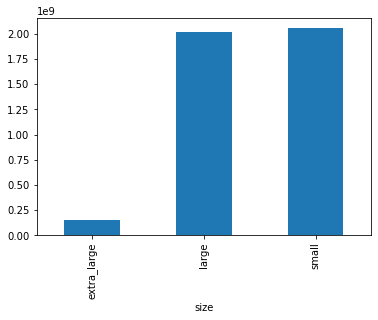

In [161]:
nb_sold_by_size.plot(kind="bar")
plt.show()

날짜별로 아보카도가 팔린 양의 합을 시각화 할수도 있다.  

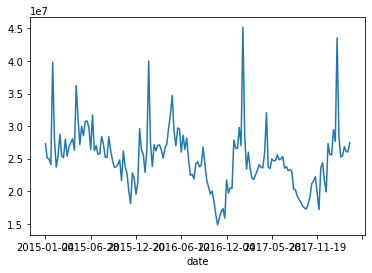

In [162]:
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()
nb_sold_by_date.plot(kind="line")
plt.show()

scatter point는 numerical variable 끼리의 관계를 파악하는데 용이하다. `nb_sold`와 `avg_price`의 관계는 다음과 같다.  

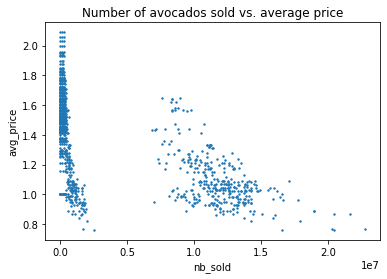

In [163]:
avocados.plot(x="nb_sold",y="avg_price",kind="scatter",title="Number of avocados sold vs. average price",s=2)
plt.show()

conventional한 avocado 와 organic한 avocado의 평균 가격을 히스토그램을 통해 비교해보도록 하자.  

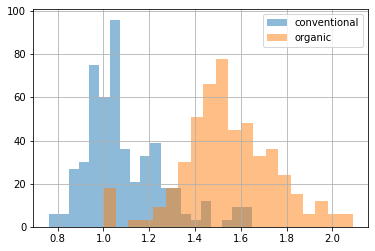

In [164]:
avocados[avocados["type"]=="conventional"]["avg_price"].hist(alpha=0.5,bins = 20)
avocados[avocados["type"]=="organic"]["avg_price"].hist(alpha=0.5,bins = 20)
plt.legend(["conventional","organic"])
plt.show()

### Missing values

data는 완벽하지 않기 때문에, missing values가 있을 수 있다. pandas Df에서는 missing value를 `NaN` 이라고 표시된다. missing value인지 아닌지를 확인하는 방법은 `isna()`를 사용하는 것이다.  

In [166]:
print(avocados_2016.isna())

      date   type   year  avg_price   size  nb_sold
52   False  False  False      False  False    False
53   False  False  False      False  False    False
54   False  False  False      False  False    False
55   False  False  False      False  False    False
56   False  False  False      False  False    False
..     ...    ...    ...        ...    ...      ...
944  False  False  False      False  False    False
945  False  False  False      False  False    False
946  False  False  False      False  False    False
947  False  False  False      False  False    False
948  False  False  False      False  False    False

[312 rows x 6 columns]


`.any()`는 column에 대해 NaN이 있는지 없는지 알려준다.  

In [171]:
print(avocados_2016.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


흠..보니까 missing value가 없는 data긴 하네....
`.dropna()`는 missing value가 있는 row를 없애준다.  

In [172]:
avocados_complete = avocados_2016.dropna()
print(avocados_complete.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


그러나 이렇게 없애기만 하면, 많은 data 손실이 있을 수 있어 NaN을 다른 수로 바꾸는 방법도 있다.  

In [173]:
avocados_filled = avocados_2016.fillna(0)

### Creating Df

Df를 만드는 방법은 크게 2가지가 있다. <span style="color:lightgreen">list of dictionaries</span> 나 <span style="color:salmon">dictionary of lists</span>를 통해서 말이다.  <span style="color:lightgreen">list of dictionaries</span>는 df가 row별로 만들어지며 <span style="color:salmon">dictionary of lists</span>는 data가 column 별로 만들어진다.  

__list of dictionaries__


In [174]:
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348}
]
avocados_2019 = pd.DataFrame(avocados_list)
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


__dictionary of list__

In [ ]:
avocados_dict = {
  "date": ["2019-11-17","2019-12-01"],
  "small_sold": [10859987,9291631],
  "large_sold": [	7674135,	6238096]
}

avocados_2019 = pd.DataFrame(avocados_dict)
print(avocados_2019)